In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns; sns.set(color_codes=True)

In [35]:
df_train = pd.read_pickle('exp_train.pkl')
df_valid = pd.read_pickle('exp_valid.pkl')
df_test = pd.read_pickle('exp_test.pkl')

In [36]:
network = ['out_degree_centrality','in_degree_centrality','closeness_centrality','betweenness_centrality','eigenvector_centrality','harmonic_centrality','average_neighbor_degree','square_clustering','core_number','pagerank',
'hubs','authorities','in_degree_0','out_degree_0']

In [37]:
funda = ['FF_ASSETS', 'FF_ASSETS_CURR_OTH', 'FF_ASSETS_OTH', 'FF_ASSET_TURN','FF_BPS_TANG', 'FF_CAPEX', 'FF_CAPEX_SALES', 'FF_COGS','FF_COM_EQ_ASSETS', 'FF_CURR_RATIO', 'FF_DEBT_ASSETS', 'FF_DEBT_CF','FF_DEBT_EBITDA_OPER',
'FF_EBITDA_OPER', 'FF_EBIT_OPER','FF_ENTRPR_VAL', 'FF_EPS_DIL', 'FF_EPS_DIL_BEF_UNUSUAL','FF_FIN_ACTIV_OTH_CF', 'FF_FIN_CF', 'FF_FREE_CF', 'FF_GROSS_MGN','FF_INT_EXP_NET','FF_INVEST_ADV', 'FF_INVEST_CF', 'FF_INVEST_PURCH_SALE_CF',
'FF_INVEST_USES_CF', 'FF_LIABS', 'FF_LIABS_CURR_OTH', 'FF_LIABS_OTH','FF_MISC_FUNDS_CF', 'FF_MKT_VAL', 'FF_NET_DEBT','FF_NET_INC', 'FF_NET_INC_AFT_XORD', 'FF_NET_INC_BASIC', 'FF_NET_MGN', 'FF_NON_OPER_INC', 'FF_OPER_CF', 
'FF_OPER_MGN', 'FF_PAY_OUT_RATIO', 'FF_PBK','FF_PCF', 'FF_PE', 'FF_PSALES', 'FF_PTX_MGN', 'FF_QUICK_RATIO','FF_ROA', 'FF_ROE', 'FF_ROTC', 'FF_SALES_PS', 'FF_SGA','FF_SGA_OTH_EXP', 'FF_STK_CHG_CF', 'FF_TCAP', 'FF_TURN_RATE','FF_UNUSUAL_EXP']

In [38]:
sector = ['SECTOR_CODE1200','SECTOR_CODE1300','SECTOR_CODE1400','SECTOR_CODE2100','SECTOR_CODE2200','SECTOR_CODE2300','SECTOR_CODE2400','SECTOR_CODE3100','SECTOR_CODE3200','SECTOR_CODE3250','SECTOR_CODE3300','SECTOR_CODE3350','SECTOR_CODE3400',
 'SECTOR_CODE3500','SECTOR_CODE4600','SECTOR_CODE4700','SECTOR_CODE4800','SECTOR_CODE4900','SECTOR_CODE6000']

In [39]:
region = ['Africa and Middle East Unallocated Area','Americas Unallocated Revenue Area','Area Unspecified','Asia/Pacific Unallocated Area','Australia and New Zealand','Caribbean','Central America','Central Middle East',
 'Eastern Africa','Eastern European Union','Eastern Middle East','Eastern Non-European Union','Europe Unallocated Area','Far East','Indian Region','Non-Geographic Revenue Area','Non-Operating Area','Northern European Union',
 'Northern Non-European Union','Pacific Islands','South America','Southern Africa','Southern European Union','Southern Non-European Union','United States and Canada','Western Africa','Western European Union','Western Middle East',
 'Western Non-European Union']

# df_train

In [40]:
df_train = df_train.dropna(subset = ['out_group'])
df_train_features = df_train[network+funda+sector+region]
df_train_features = df_train_features.apply(lambda x: x.fillna(x.mean()),axis=0)

In [41]:
#list(df_train.columns)

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18736 entries, 0 to 37754
Columns: 142 entries, cusip_9 to Western Non-European Union
dtypes: datetime64[ns](1), float64(85), int64(1), object(6), uint8(49)
memory usage: 14.3+ MB


# df_valid

In [43]:
df_valid = df_valid.dropna(subset = ['out_group'])
df_valid_features = df_valid[network+funda+sector+region]
df_valid_features = df_valid_features.apply(lambda x: x.fillna(x.mean()),axis=0)

In [58]:
df_valid['out_group'].count()

4848

# df_test

In [46]:
df_test = df_test.dropna(subset = ['out_group'])
df_test_features = df_test[network+funda+sector+region]
df_test_features = df_test_features.apply(lambda x: x.fillna(x.mean()),axis=0)

In [47]:
df_test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5352 entries, 12 to 47212
Columns: 119 entries, out_degree_centrality to Western Non-European Union
dtypes: float64(71), uint8(48)
memory usage: 3.2 MB


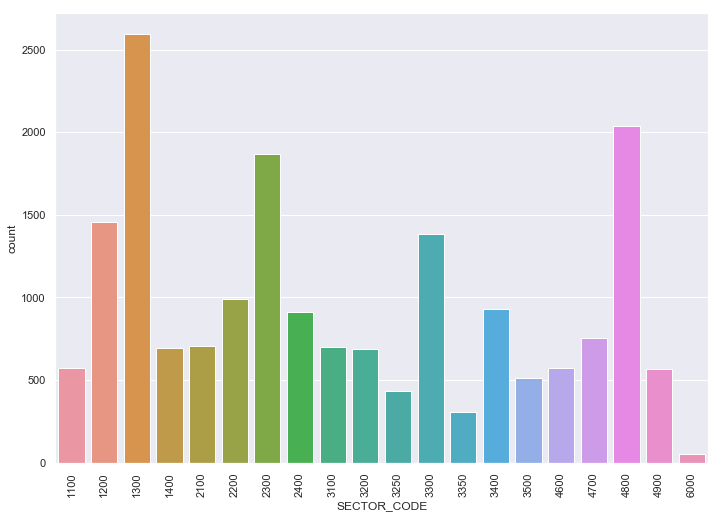

In [48]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.countplot(x="SECTOR_CODE", data=df_train)
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [49]:
#df_train['SECTOR_CODE'].value_counts()

# Classify

In [50]:
X_train = df_train_features
y_train = df_train['out_group']
X_valid = df_valid_features
y_valid = df_valid['out_group']
X_test = df_test_features
y_test = df_test['out_group']

In [51]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(-1, 1))
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [53]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from  sklearn.ensemble  import  GradientBoostingClassifier

I:\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.metrics import recall_score, accuracy_score

In [60]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [81]:
from  sklearn.ensemble  import  GradientBoostingClassifier
from sklearn.metrics import recall_score, accuracy_score
from scipy.stats import randint as sp_randint

# num_valid_size = len(X_train_scaled)-len(X_valid)
# test_fold = -1 * np.ones(len(X_train_scaled))
# test_fold[num_valid_size:] = 0
# ps = PredefinedSplit(test_fold)
        
# specify parameters and distributions to sample from
        
        
param_dist ={"max_depth": sp_randint(3, 12),
                        "min_samples_split": sp_randint(100,1000),
                        "min_samples_leaf": sp_randint(100,1000),
                        "n_estimators":sp_randint(5, 60),
                     "learning_rate":uniform(0.001, 0.1),
                     "subsample":uniform(0.6, 0.4)
                      }

clf_RF = GradientBoostingClassifier(random_state=1)

        
        # run randomized search
n_iter_search = 100
estim = RandomizedSearchCV(clf_RF, param_distributions=param_dist,
                                           n_iter=n_iter_search,scoring='accuracy',
                                          cv=5,iid=False,n_jobs=-1)             
estim.fit(X_train_scaled, y_train)




# model = GradientBoostingClassifier()
# model.fit(X_train_scaled, y_train)
# predicted_gdbt = model.predict(X_test_scaled )
# accuracy_score(y_test, predicted_gdbt)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=False, n_iter=100, n_jobs=-1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021097BF1898>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021097BF19E8>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021097BF1F28...097BF1CF8>, 'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002109

In [82]:
estim.best_params_

{'learning_rate': 0.08490737972862442,
 'max_depth': 5,
 'min_samples_leaf': 359,
 'min_samples_split': 666,
 'n_estimators': 45,
 'subsample': 0.6131555946086905}

In [85]:
predicted_gdbt = estim.predict(X_valid_scaled )
accuracy_score(y_valid, predicted_gdbt)

0.6577970297029703

# Voting 

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [97]:
xgb_clf = XGBClassifier()
dt_clf = DecisionTreeClassifier(max_depth=2)
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,), random_state=1)

voting_clf = VotingClassifier(estimators = [('xgb', xgb_clf),('dt',dt_clf), ('mlp',mlp_clf)],
                             voting = 'soft')

for clf in (xgb_clf,dt_clf,mlp_clf,voting_clf):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_valid_scaled)
    print(accuracy_score(y_valid, y_pred))

I:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.661509900990099
0.570957095709571
0.590552805280528
0.6674917491749175


I:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [54]:
y_train.value_counts()

-1    8230
 0    6367
 1    4916
Name: out_group, dtype: int64

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_xgb)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal()

array([0.7137948 , 0.80342927, 0.47333772])

In [25]:
imp_features = pd.DataFrame(list(zip(X_train.columns, model.feature_importances_)), columns = ['features','importance_score'])
imp_features.sort_values(by='importance_score', ascending=False, inplace=True)
imp_features.set_index('features', inplace=True)
#imp_features.head()

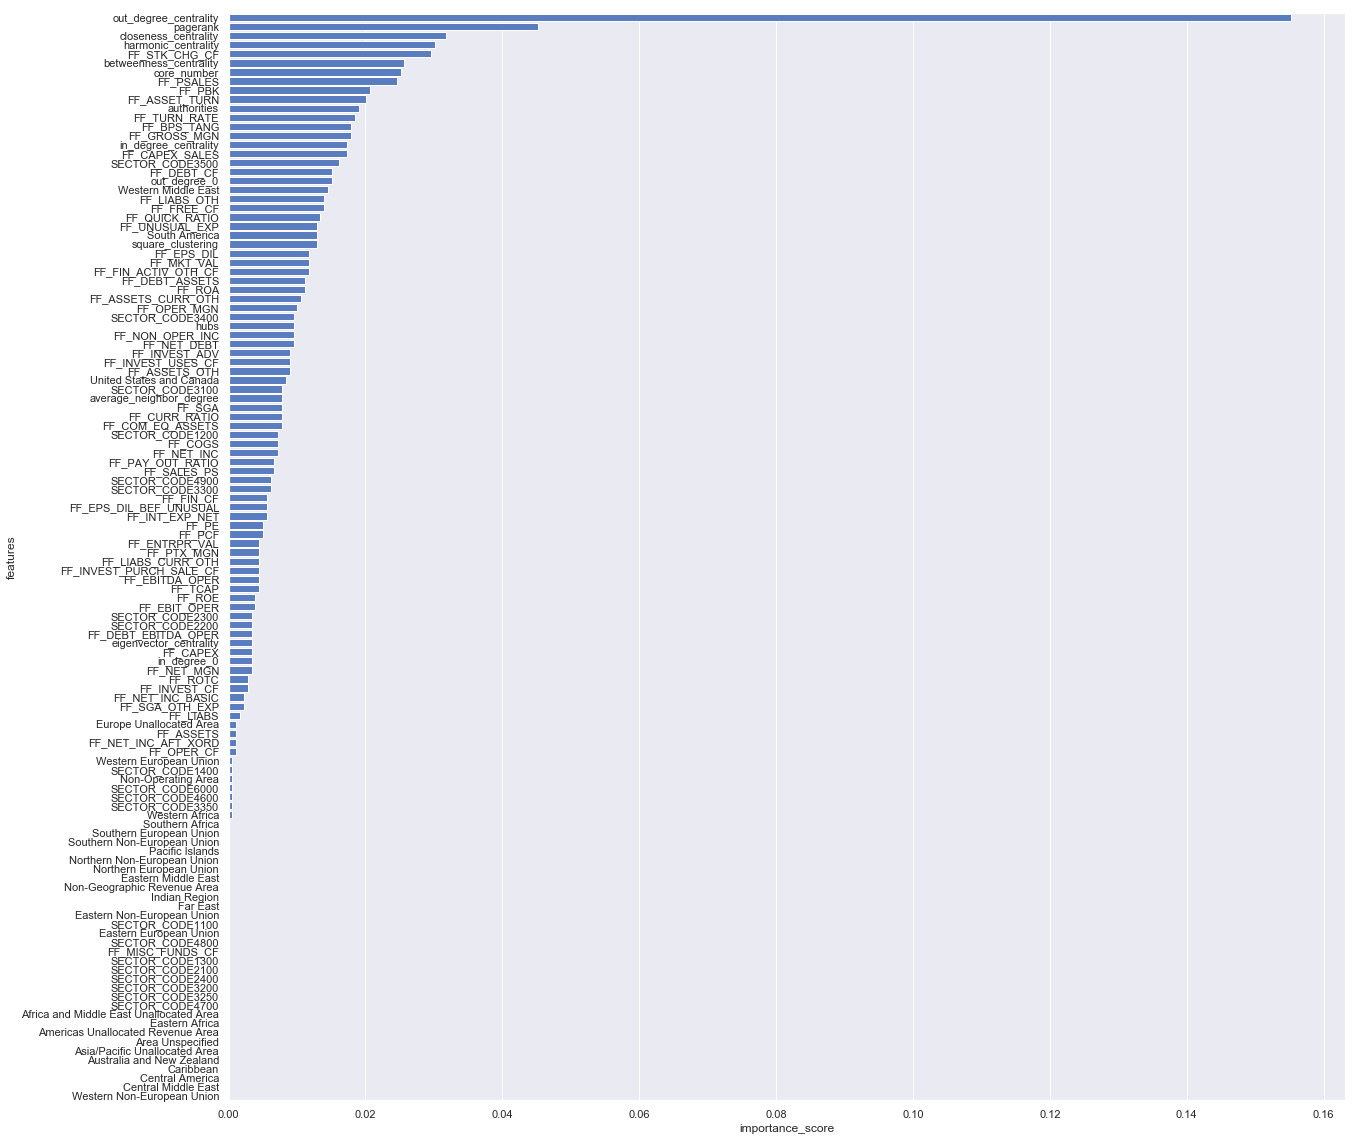

In [26]:
f, ax=plt.subplots(figsize=(20,20))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='importance_score', y=imp_features.index, data = imp_features, color='b')
plt.show()
# pylab.rcParams['figure.figsize'] = (30, 20)
# pylab.savefig('feature selection.png', dpi=400, bbox_inches = 'tight')

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train_scaled, y_train)
predicted_tree = tree_clf.predict(X_test_scaled)
accuracy_score(y_test, predicted_tree)

0.6546540759298516

In [29]:
cm = confusion_matrix(y_test, predicted_gdbt)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal()

array([0.68777614, 0.77587263, 0.50888743])

In [30]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,), random_state=1)
mlp.fit(X_train_scaled, y_train)
pred_mlp = mlp.predict(X_test_scaled)
accuracy_score(y_test, pred_mlp)

0.6438620158026594

In [31]:
cm = confusion_matrix(y_test, pred_mlp)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal()

array([0.76435935, 0.81383956, 0.29953917])

# Regression

In [163]:
features = ['out_degree_centrality', 'in_degree_centrality',
       'closeness_centrality', 'betweenness_centrality',
       'eigenvector_centrality', 'harmonic_centrality',
       'average_neighbor_degree', 'square_clustering', 'core_number',
       'pagerank', 'hubs', 'authorities', 'in_degree_0',
       'out_degree_0', 'out_diff_ratio','out_diff',
       'FF_ASSETS', 'FF_ASSETS_CURR_OTH', 'FF_ASSETS_OTH', 'FF_ASSET_TURN',
       'FF_BPS_TANG', 'FF_CAPEX', 'FF_CAPEX_SALES', 'FF_COGS',
       'FF_COM_EQ_ASSETS', 'FF_CURR_RATIO', 'FF_DEBT_ASSETS', 'FF_DEBT_CF',
       'FF_DEBT_EBITDA_OPER', 'FF_EBITDA_OPER', 'FF_EBIT_OPER',
       'FF_ENTRPR_VAL', 'FF_EPS_DIL', 'FF_EPS_DIL_BEF_UNUSUAL',
       'FF_FIN_ACTIV_OTH_CF', 'FF_FIN_CF', 'FF_FREE_CF', 'FF_GROSS_MGN',
       'FF_INT_EXP_NET',
       'FF_INVEST_ADV', 'FF_INVEST_CF', 'FF_INVEST_PURCH_SALE_CF',
       'FF_INVEST_USES_CF', 'FF_LIABS', 'FF_LIABS_CURR_OTH', 'FF_LIABS_OTH',
     'FF_MISC_FUNDS_CF', 'FF_MKT_VAL', 'FF_NET_DEBT',
       'FF_NET_INC', 'FF_NET_INC_AFT_XORD', 'FF_NET_INC_BASIC', 'FF_NET_MGN',
       'FF_NON_OPER_INC', 'FF_OPER_CF', 
        'FF_OPER_MGN', 'FF_PAY_OUT_RATIO', 'FF_PBK',
       'FF_PCF', 'FF_PE', 'FF_PSALES', 'FF_PTX_MGN', 'FF_QUICK_RATIO',
       'FF_ROA', 'FF_ROE', 'FF_ROTC', 'FF_SALES_PS', 'FF_SGA',
       'FF_SGA_OTH_EXP', 'FF_STK_CHG_CF', 'FF_TCAP', 'FF_TURN_RATE',
       'FF_UNUSUAL_EXP','SECTOR_CODE1100',
 'SECTOR_CODE1200',
 'SECTOR_CODE1300',
 'SECTOR_CODE1400',
 'SECTOR_CODE2100',
 'SECTOR_CODE2200',
 'SECTOR_CODE2300',
 'SECTOR_CODE2400',
 'SECTOR_CODE3100',
 'SECTOR_CODE3200',
 'SECTOR_CODE3250',
 'SECTOR_CODE3300',
 'SECTOR_CODE3350',
 'SECTOR_CODE3400',
 'SECTOR_CODE3500',
 'SECTOR_CODE4600',
 'SECTOR_CODE4700',
 'SECTOR_CODE4800',
 'SECTOR_CODE4900',
 'SECTOR_CODE6000']

In [164]:
#df_test = df_test.dropna(subset = ['out_group'])
df_test['out_diff_ratio'] = df_test['out_diff_ratio'].replace(np.inf, np.nan)
df_test = df_test[features]
df_test = df_test.apply(lambda x: x.fillna(x.mean()),axis=0)

In [165]:
df_test.columns

Index(['out_degree_centrality', 'in_degree_centrality', 'closeness_centrality',
       'betweenness_centrality', 'eigenvector_centrality',
       'harmonic_centrality', 'average_neighbor_degree', 'square_clustering',
       'core_number', 'pagerank', 'hubs', 'authorities', 'in_degree_0',
       'out_degree_0', 'out_diff_ratio', 'out_diff', 'FF_ASSETS',
       'FF_ASSETS_CURR_OTH', 'FF_ASSETS_OTH', 'FF_ASSET_TURN', 'FF_BPS_TANG',
       'FF_CAPEX', 'FF_CAPEX_SALES', 'FF_COGS', 'FF_COM_EQ_ASSETS',
       'FF_CURR_RATIO', 'FF_DEBT_ASSETS', 'FF_DEBT_CF', 'FF_DEBT_EBITDA_OPER',
       'FF_EBITDA_OPER', 'FF_EBIT_OPER', 'FF_ENTRPR_VAL', 'FF_EPS_DIL',
       'FF_EPS_DIL_BEF_UNUSUAL', 'FF_FIN_ACTIV_OTH_CF', 'FF_FIN_CF',
       'FF_FREE_CF', 'FF_GROSS_MGN', 'FF_INT_EXP_NET', 'FF_INVEST_ADV',
       'FF_INVEST_CF', 'FF_INVEST_PURCH_SALE_CF', 'FF_INVEST_USES_CF',
       'FF_LIABS', 'FF_LIABS_CURR_OTH', 'FF_LIABS_OTH', 'FF_MISC_FUNDS_CF',
       'FF_MKT_VAL', 'FF_NET_DEBT', 'FF_NET_INC', 'FF_NET_IN

In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_1 = scaler.fit_transform(df_test)

In [167]:
df_1 = pd.DataFrame(df_1, columns = df_test.columns)

In [168]:
df_1.head().T

,0,1,2,3,4
out_degree_centrality,0.169444,2.859200e-01,-0.412933,-5.294088e-01,-5.294088e-01
in_degree_centrality,-0.304154,-3.041536e-01,-0.118544,-2.113488e-01,1.180724e+00
closeness_centrality,0.915453,6.894964e-01,0.972844,9.347635e-01,9.526560e-01
betweenness_centrality,-0.132237,-1.915043e-01,-0.181270,-2.124390e-01,-2.124390e-01
eigenvector_centrality,-0.132201,-1.588911e-01,0.674325,7.288415e-01,-2.039881e-01
harmonic_centrality,0.901220,6.773679e-01,1.013896,9.844661e-01,9.627085e-01
average_neighbor_degree,-0.470930,-1.285459e-01,-0.484784,-5.679057e-01,-5.679057e-01
square_clustering,2.828633,-1.061958e-01,-0.106196,-1.061958e-01,-1.061958e-01
core_number,0.110735,6.089028e-01,-0.138349,-6.365172e-01,1.107071e+00
pagerank,-0.310113,-4.129180e-01,-0.259740,-3.843382e-01,1.088622e+00


In [176]:
import statsmodels.formula.api as sm
result = sm.ols(formula="out_diff ~ betweenness_centrality + FF_ASSETS", data=df_1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               out_diff   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     34.61
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           1.16e-15
Time:                        15:20:21   Log-Likelihood:                -7619.3
No. Observations:                5394   AIC:                         1.524e+04
Df Residuals:                    5391   BIC:                         1.526e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.94